In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = pd.read_csv("lichess_2015.csv")
test.head()

,Unnamed: 0,White Elo,Black Elo,Result,Opening,ECO,White Score
0,0,1489,1797,0-1,French Defense: Carlson Gambit,C01,-1
1,1,1379,1558,0-1,Lion Defense: Lion's Jaw,B07,-1
2,2,1666,1258,1-0,"King's Gambit Accepted, Fischer Defense",C34,1
3,3,1528,1662,0-1,Scandinavian Defense: Mieses-Kotroc Variation,B01,-1
4,4,1528,1504,1-0,Scandinavian Defense: Mieses-Kotroc Variation,B01,1


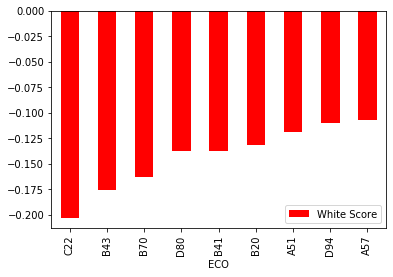

In [3]:
opening_df = test.groupby(["ECO"])
opening_results = pd.DataFrame(opening_df["White Score"].mean())
opening_count = opening_df["Result"].count()
opening_results["Count"] = opening_count
filtered_openings = opening_results.loc[opening_results["Count"] > 1000]
sort_eco = filtered_openings.sort_values("White Score", ascending=True)
sort_eco.iloc[1:10].plot(kind='bar', y="White Score", color="red")
plt.show()

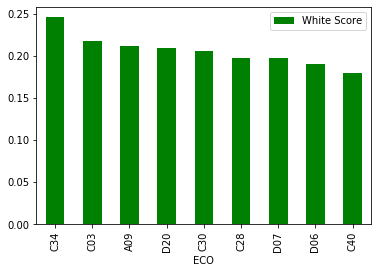

In [4]:
sort_eco_dec = filtered_openings.sort_values("White Score", ascending=False)
sort_eco_dec.iloc[1:10].plot(kind='bar', y="White Score", color="green")
plt.show()

In [25]:
test.head()

,Unnamed: 0,White Elo,Black Elo,Result,Opening,ECO,White Score
0,0,1489,1797,0-1,French Defense: Carlson Gambit,C01,-1
1,1,1379,1558,0-1,Lion Defense: Lion's Jaw,B07,-1
2,2,1666,1258,1-0,"King's Gambit Accepted, Fischer Defense",C34,1
3,3,1528,1662,0-1,Scandinavian Defense: Mieses-Kotroc Variation,B01,-1
4,4,1528,1504,1-0,Scandinavian Defense: Mieses-Kotroc Variation,B01,1


In [7]:
test["Diff"] = (test["White Elo"] - test["Black Elo"])
min_diff = np.min(test["Diff"])
max_diff = np.max(test["Diff"])

In [14]:
#bins = pd.cut(test["Diff"], 20)
score = pd.DataFrame(test.groupby(pd.cut(test["Diff"], bins))["White Score"].mean())
score["Number of Games"] = test.groupby(pd.cut(test["Diff"], bins))["ECO"].count()
score

,White Score,Number of Games
Diff,,
"(-1622.0, -1452.684]",-1.000000,4
"(-1452.684, -1283.368]",-1.000000,20
"(-1283.368, -1114.053]",-0.925234,107
"(-1114.053, -944.737]",-0.913644,579
"(-944.737, -775.421]",-0.877358,2544
"(-775.421, -606.105]",-0.844474,9156
"(-606.105, -436.789]",-0.765464,33044
"(-436.789, -267.474]",-0.610364,109279
"(-267.474, -98.158]",-0.335944,363394


In [32]:
bins = np.linspace(min_diff, max_diff, 20)
center = np.array([])
for i in range(len(bins) - 1):
    center = np.append(center, ((bins[i] + bins[i + 1])/2.))

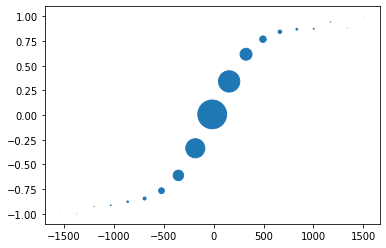

In [51]:
plt.scatter(center, score["White Score"].values, s= .001 * score["Number of Games"].values)
plt.show()

In [27]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.8.final.0
python-bits: 64
OS: Darwin
OS-release: 18.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.24.2
pytest: None
pip: 18.1
setuptools: 40.6.2
Cython: 0.29.10
numpy: 1.16.4
scipy: 1.3.0
pyarrow: None
xarray: None
IPython: 7.5.0
sphinx: None
patsy: None
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.1.0
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: None
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


In [52]:
A = np.random.rand(5)
B = np.random.rand(5)
C = np.random.rand(5)

In [ ]:
plt.bar